**Задача №2**

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

**Пункт А**
Определить по выборке моду, медиану. размах, оценку коэффициента асимметрии

In [29]:
np.random.seed(0)
N = 25
sample = np.random.exponential(scale=1, size=N)

mode = sample[np.argmax(np.bincount(sample.astype(int)))]
print(f"Mode: {mode}")

median = np.median(sample)
print(f"Median: {median}")

_range = np.ptp(sample)
print(f"Range: {_range}")

skewness = skew(sample)
print(f"Skewness: {skewness}")

Mode: 0.79587450816311
Median: 0.9232231458040688
Range: 3.824796251482624
Skewness: 1.0145066660346838


**Пункт Б**
Построить эмпирическую функцию распределения, гистограмму и boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

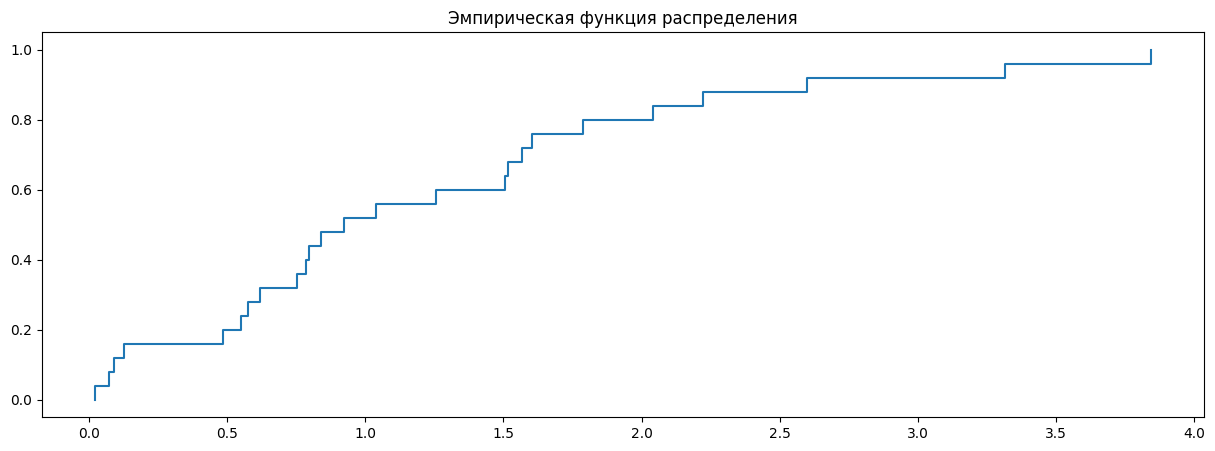

In [30]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'Гистограмма')

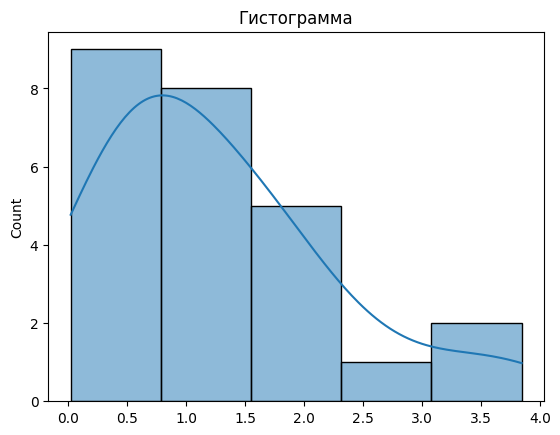

In [31]:
# Гистограмма

bins = int(_range / (_range / (1 + math.log(N, 2))))


sns.histplot(sample, bins=bins, kde=True)
plt.title("Гистограмма")

Text(0.5, 1.0, 'Boxplot')

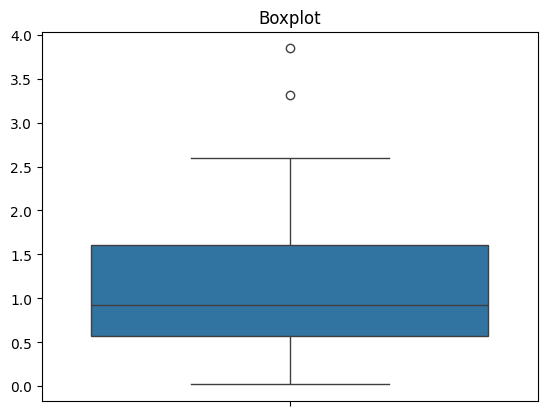

In [32]:
# Boxplot

sns.boxplot(sample)
plt.title("Boxplot")

**Пункт С**
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

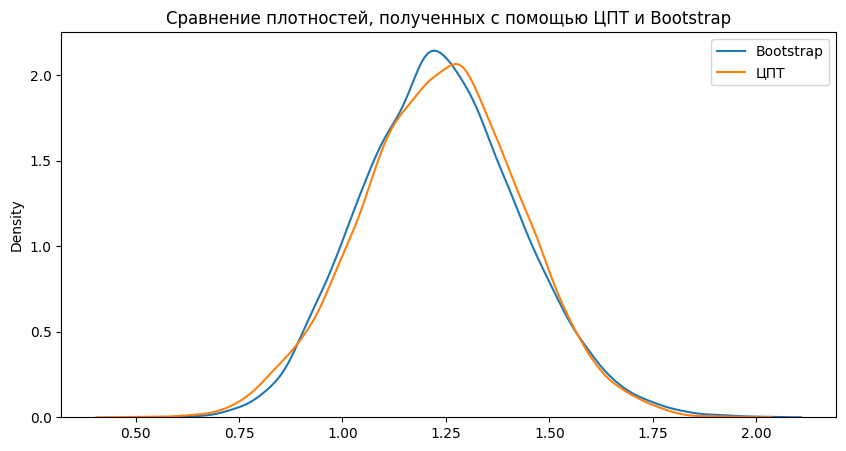

In [33]:
means = [np.mean(np.random.choice(sample, size=N, replace=True)) for _ in range(10000)]

plt.figure(figsize=(10, 5))
sns.kdeplot(means, label="Bootstrap")
sns.kdeplot(np.random.normal(np.mean(sample), np.std(sample) / np.sqrt(N), size=10000), label="ЦПТ")
plt.legend()
plt.title("Сравнение плотностей, полученных с помощью ЦПТ и Bootstrap")
plt.show()

**Пункт D**
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициента асимметрии будет меньше 1

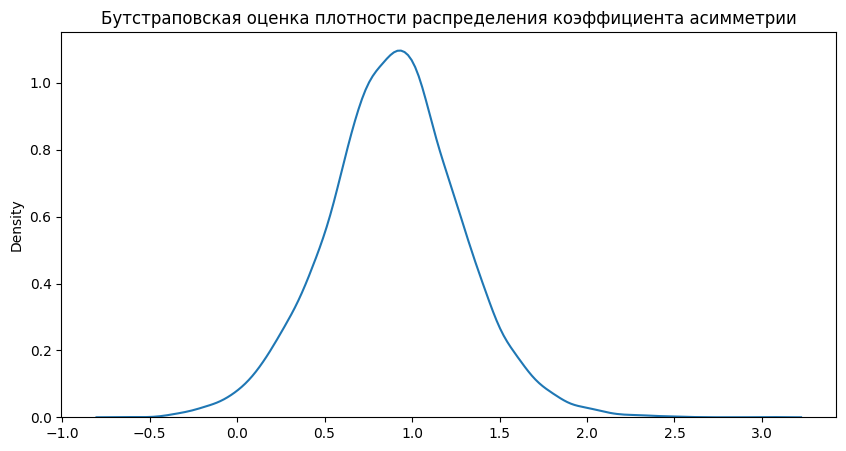

P(skewness < 1): 0.612


In [34]:
bootstrap_skewness = [skew(np.random.choice(sample, size=N, replace=True)) for _ in range(10000)]
plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_skewness)
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.show()
probability = np.mean(np.array(bootstrap_skewness) < 1)
print(f"P(skewness < 1): {probability}")

**Пункт E**
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

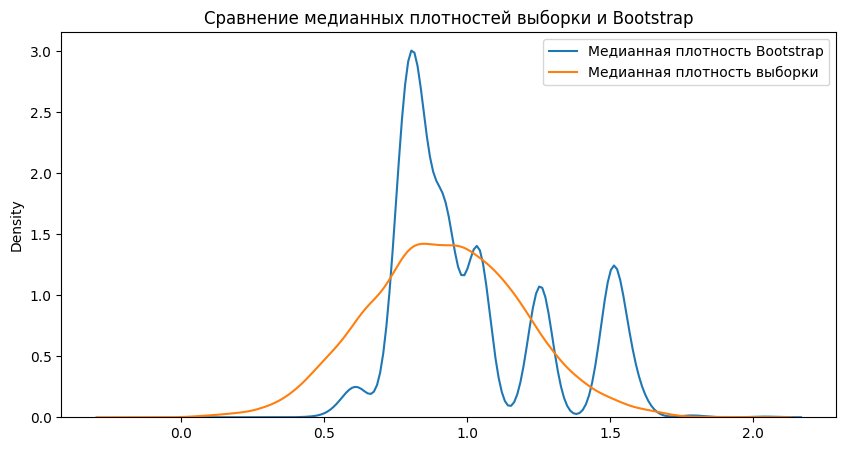

In [35]:
bootstrap_medians = [np.median(np.random.choice(sample, size=N, replace=True)) for _ in range(10000)]
plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_medians, label="Медианная плотность Bootstrap")
sns.kdeplot(np.random.normal(median, np.std(bootstrap_medians), size=10000), label="Медианная плотность выборки")
plt.legend()
plt.title("Сравнение медианных плотностей выборки и Bootstrap")
plt.show()

**Справка по использованным функциям из различных библиотек**

np.random.exponential(scale=1, size=n) - генерация выборки из 25 значений, распределенных по экспоненциальному закону

np.argmax(np.bincount(sample.astype(int))) - подсчет поды выборки

np.median(sample) - вычисление медианы

np.ptp(sample) - вычисление размаха выборки

skew(sample) - оценка коэффициента асимметрии выборки

np.random.choice(sample, size=n, replace=True) - создание бутстраповской выборки

np.mean() - вычисление среднего значения по бутстраповской выборке

np.random.normal(np.mean(sample), np.std(sample)/np.sqrt(n), size=10000) - генерация 10000 значения из нормального распределения, используя ЦПТ